# 3. 다양한 분류 알고리즘 (2)


## 1. 확률적 경사 하강법


### 1) 럭키백에 이어서..
마냥 어민들의 물고기를 기다릴 수도 없고, 어떤 물고기가 올지도 모르고..

위 같은 문제 상황에서 할 수 있는 건 두 가지다.
- 추가 될 때마다 새로운 모델을 구현한다.
- 새로운 데이터가 추가 되었을 때 일부 데이터를 버려서 데이터의 크기를 일정하게 유지한다.
<p> 그러나 두 방법 모두 현실적으로, 비용적으로 봤을 때 비효율적이다.
<p> 그래서 여기서는, 새로운 데이터에 대해 모델을 업데이트 하는 방법에 대해 알아보려 한다.

### 2) 점진적 학습과 온라인 학습

모델을 업데이트 하는 방법으로는 2가지가 있다.


- **점진적 학습** : 모델을 서비스 제공 하는 도중, 또는 서비스하지 않는 도중에(오프라인) 모델을 업데이트 하는 방법.
- **온라인 학습** : 이름 그대로, 모델을 서비스 제공 하는 도중에 모델을 업데이트 하는 방법.
<p> 즉, 온라인 학습은 점진적 학습에 포함된다고 보면 된다.
<p> 이런 학습 방법을 위해, 데이터를 기반해 모델을 훈련하는 방법 (최적화 하는 방법) 중, 대표적인 것이 바로 **확률적 경사 하강법**이다.


단, 주의할 점은 확률적 경사 하강법은 **머신러닝, 딥러닝 알고리즘 자체는 아니다**
<p> 머신러닝 알고리즘을 훈련하는 방법, 최적화 하는 방법 중에 하나이다.
<p> 확률적 경사 하강법을 영어로 Stochastic gradient descent, SGD라고도 한다.

### 3) 확률적 경사 하강법

이름을 하나하나 뜯어보면 다음과 같다.
- 확률적 : 무작위하게
- 경사 : 기울 (추후에 설명)
- 하강 : 하강한다.
확률적 경사 하강법은 경사가 기울어진 곳으로 하강하되, **조금씩** 하강한다.
<p> 가능하면 가파른 경사로 내려가는게 더 합리적일 것이다.


이런 확률적 경사 하강법은 어떻게 진행되는지 단계별로 살펴보겠다.
1. 훈련 세트 내의 샘플을 꺼내서 **모델을 훈련**한다. 이때 몇 개를 꺼내느냐에 따라 이름이 바뀌는데,
- **하나씩** 꺼내면 **확률적 경사 하강법**
- **여러 개씩** 꺼내면 **미니배치 경사 하강법**
- **모두** 꺼내면 **배치 경사 하강법** 이라고 한다.
2. 이렇게 훈련 세트 내의 샘플을 꺼내다보면, 훈련 세트 내에 남은 샘플이 없을 것이다. 이 상태를 **에포크(epoch) 한 번이 완료** 되었다고 한다.
3. 다시 훈련 세트를 샘플로 채워서 다시 꺼낸다. 이 과정을 여러 번 반복한다. (몇 번 반복하느냐는 설정을 해주어야한다.)
<p> 사실 전체 샘플을 한 번에 꺼내 모델을 훈련하는 방법이 빠르게 최적점으로 도착할 수 있는 방법이긴하다.
<p> 그러나 딥러닝을 배울 때, 확률적 경사 하강법, 미니 배치 경사 하강법을 쓰는 이유는, 한 번에 모든 샘플을 꺼내 모델을 훈련하기에는 **메모리가 한정적**이다.
<p> 그래서 대부분은 **미니 배치, 확률적 경사 하강법**을 사용한다.

### 4) 경사의 의미 : 손실함수
알고리즘이 얼마나 나쁜지를 측정하는 척도, 함수

손실함수는 이름에서부터 알겠지만, **값이 클 수록 나쁜 알고리즘**을 뜻한다.
<p>
그래서 손실 함수의 값은 작을 수록 좋다.
<p> 즉, 손실 함수의 값이 낮아지는 방향으로 가중치와 계수를 옮기는게 확률적 경사 하강법이다. (모델을 조금씩 업데이트 하는 것.)

- 손실함수는 연속적인 값, 부드러운 곡면을 가지고 있어야 내려올 수 있다. 중간에 끊기는 부분이 있다면 손실 함수로서 사용할 수 없다.
- 즉, 손실함수로서 쓰이는 함수는 **미분가능**해야한다.
- 분류의 경우를 들어보겠다.
<p> 예측값과 정답값을 비교한 4개의 결과가 있다고 해보자. 여기서 나올 수 있는 확률은 0, 0.25, 0.5, 0.75, 1.0 총 다섯가지이다.
<p> 그러나 이 5개의 값은 그래프 상에서 연속적이지 않다. 그래서 미분도 불가능 하다.
<p>
- 즉, 분류의 경우, 모델의 성능을 정확도로 측정하나, 모델을 최적화 할 때에는 정확도를 사용할 수 없다.


- 반대로 회귀의 경우, 모델의 성능과 최적화 하는 방법이 같다.
- 평균 절댓값 오차나, 평균 제곱 오차 함수를 사용할 수 있다. 둘다 미분 가능하니 손실함수로서 사용할 수 있다.
- 보통은 평균 제곱 오차 함수를 사용한다.
- 사이킷런에서 score를 쓰면 R^2값이 나오나, 이는 설정할 수 있다.

### 5)로지스틱 손실 함수 (분류)
앞서 분류의 경우에는 정확도로 최적화를 할 수 없다고 했다.
<p> 이럴때, 로지스틱 손실 함수를 통해 최적화를 진행한다.

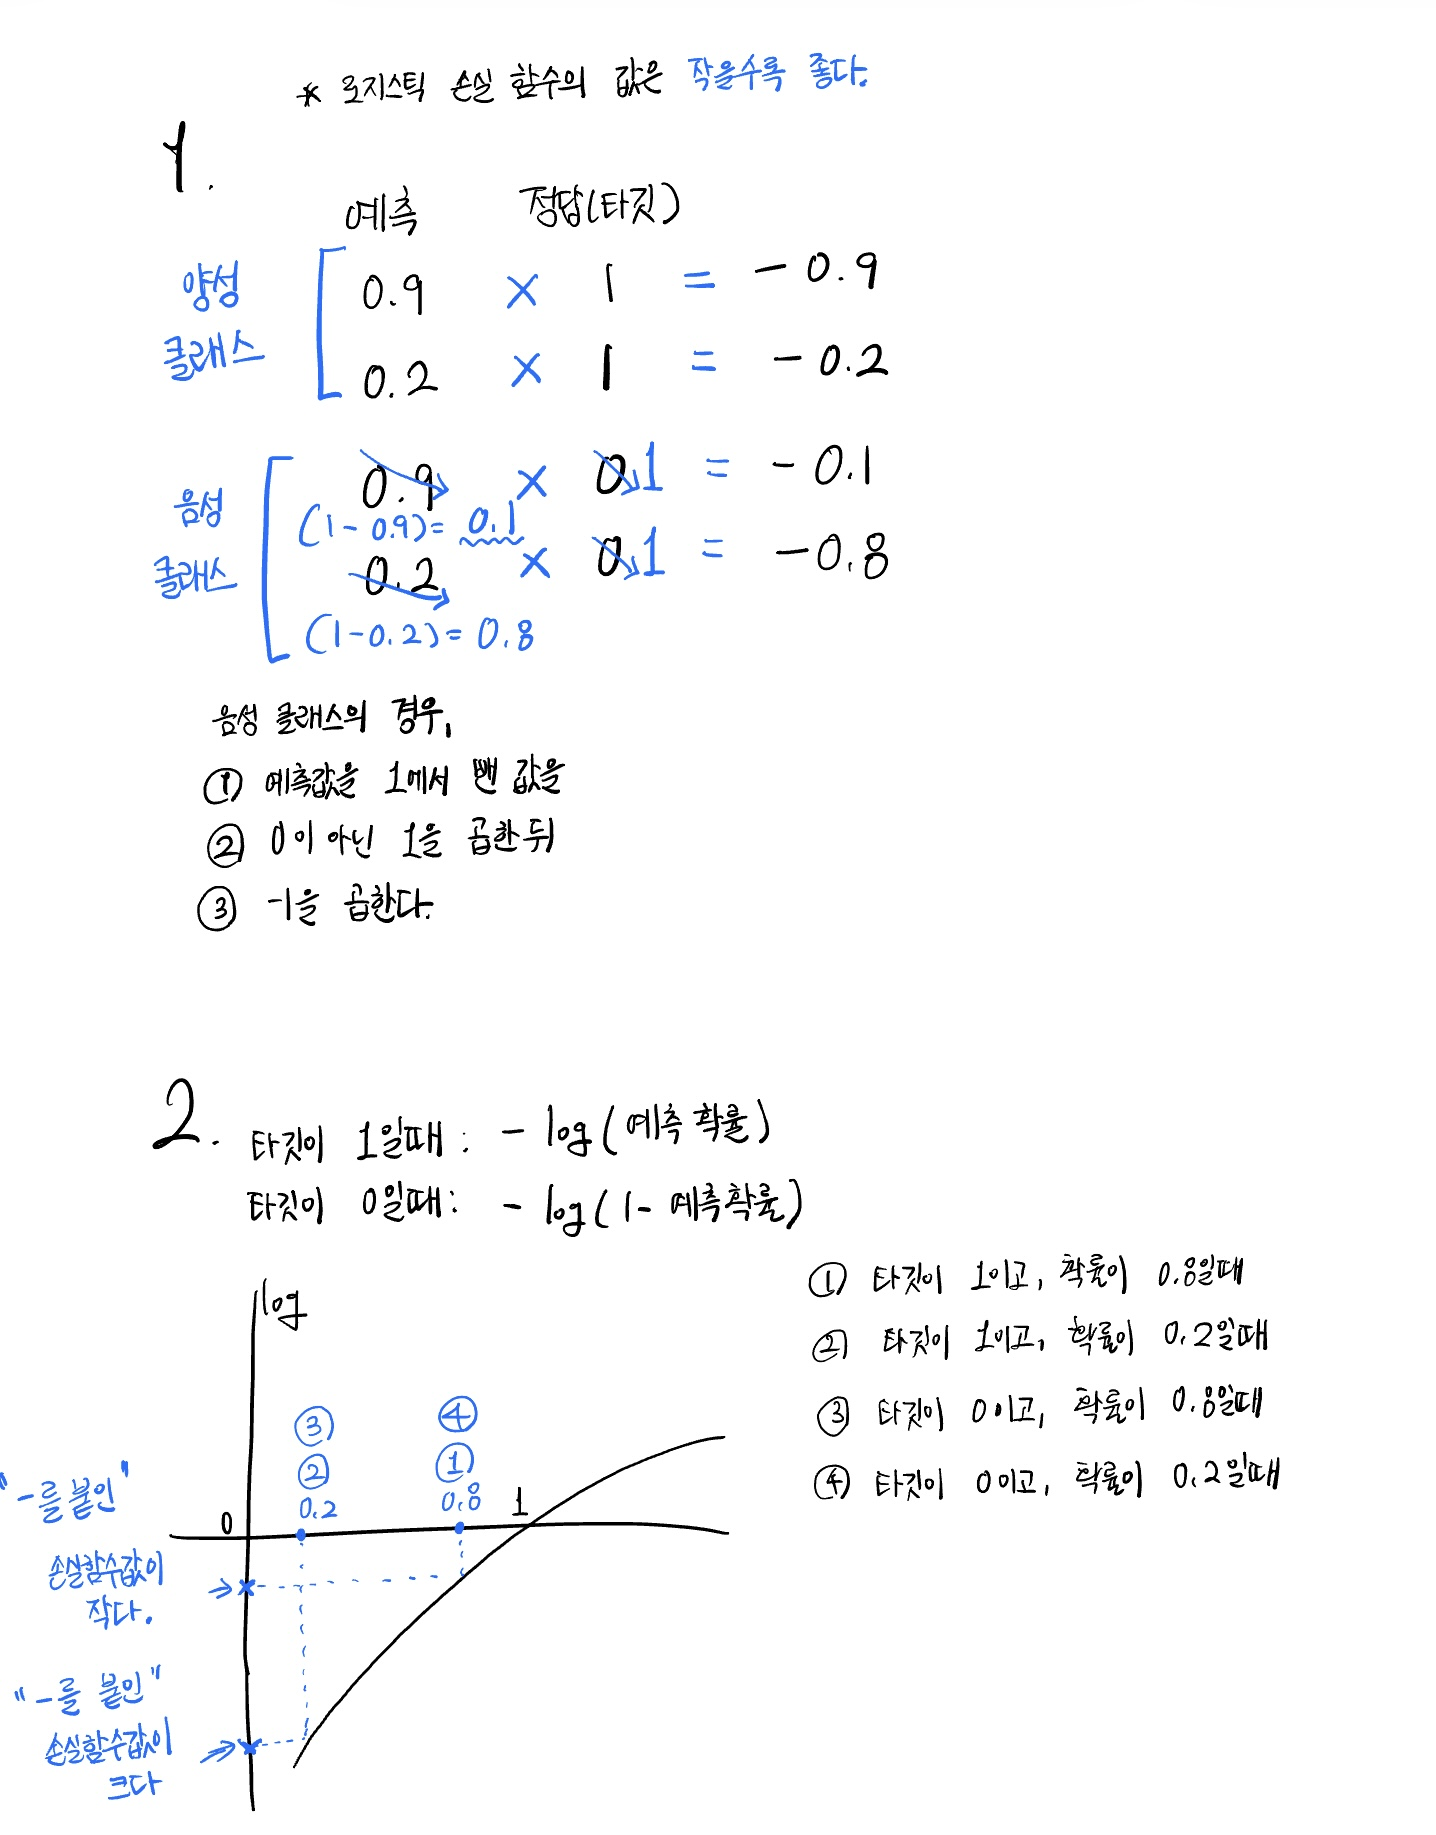

- 첫 번째는 타깃값과 예측값을 곱해 손실함수의 값을 구하는 방법이다.
- 두 번째는 예측확률와 로그함수를 이용해 손실함수의 값을 구하는 방법이다.
로그함수에 -가 곱해져 있으므로, 직관적으로 값을 판단하기에는 두 번째 방법이 더 좋아 보통은 두 번째 방법을 더 많이 사용한다.
<p>
또한, 로그함수는 미분이 가능하니까 손실함수로서 사용 가능하다.
<p>
이런 걸 로지스틱 손실함수라고도 한다. (또는 이진 크로스 엔트로피 손실함수라고도 한다.)


### 6) 데이터 전처리
각각의 특성마다 스케일이 같아야한다.
<p> 스케일이 다르면 경사가 다른 쪽으로 쏠릴 수 있기 때문이다.

In [1]:
# 판다스를 통해 데이터프레임을 가져오고
# 인덱스를 붙인 뒤
# 넘파이 배열로 바꾼다.
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# model_selection 모듈 내의 train_test_split 클래스를 통해
# 훈련세트와 테스트 세트를 나눈다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# preprocessing 모듈의 StandardScaler 클래스를 호출한 뒤
# 훈련 세트의 input 데이터를 통해 fit과 transform 한다.
# 테스트 세트의 input 데이터로 훈련 세트의 input 데이터로 fit한 모델로 표준화 한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)



### 7) SGDClassifier
로지스틱 손실 함수를 사용해 분류한다.

In [4]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss ='log', max_iter=10, random_state=42)
#log = 로지스틱손실함수 지정, 여기서는 로그함수 (로지스틱 회귀 모델 훈련). 즉, 실제로 어떤 모델을 최적화할 것인지를 지정해주어야한다
# 그걸 loss에서 정한다. 즉, 손실함수를 지정한다.
# max_iter = 10은 점진적인 학습을 위해 설정한다, 에포크와 동일한 의미이다. 즉, 훈련세트를 10번만 사용하겠다는 뜻!

sc.fit(train_scaled, train_target)

#정확도 출력
print(sc.score(train_scaled, train_target))
#0.77..

print(sc.score(test_scaled, test_target))
#0.775

sc.partial_fit(train_scaled, train_target)
# fit을 다시 호출하면 이전에 학습했던 가중치를 다 버리고 다시 fit을 하나,
# partial_fit을 쓰면 가중치를 유지한 상태로 한 번 더 훈련한다.

print(sc.score(train_scaled, train_target))
#0.815..

print(sc.score(test_scaled, test_target))
#0.825

0.773109243697479
0.775
0.8151260504201681
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


참고로, linear_model의 SGDClassifier는 **미니배치와 배치 경사 하강법**을 지원하지 **않는다.**
<p>
ConvergenceWarning 경고는, 모델이 충분히 수렴하지 않았을 때 이 경고를 보낸다.
<p>
이 경고를 보았다면 max_iter 매개변수의 값을 늘려 주는 것이 좋다.

### 8) 에포크와 과대적합, 과소적합의 관계와 조기종료


이전에, 규제가 커지만 과대적합. 규제가 작아지면 과소적합임을 배웠었다.
<p>
에포크도 비슷하다. 에포크가 커지면 과대적합, 에포크가 작아지면 과소적합.
<p>
조기종료 : 중간지점, 테스트 세트의 성능이 떨어지기 전. 훈련세트와의 절충점이 있을 텐데, 이 지점까지만 훈련하게 하도록 한다.

### 9) 조기종료
훈련 세트와 테스트 세트의 차이가 적은 최적점을 찾아보자.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


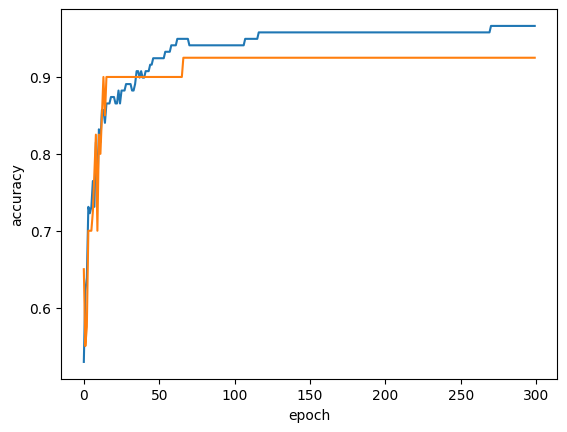

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [10]:
import numpy as np

sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []

classes = np.unique(train_target)
for _ in range(0,300) :
  sc.partial_fit(train_scaled, train_target, classes = classes)
# partial_fit 메소드는 훈련 세트의 일부만 주어질 수 있다고 가정한다.
#fit을 앞에 쓰지 않으면, 샘플 개수와 클래스 개수를 알 수 없다.
# 그래서 전체 샘플의 클래스 개수, 목록을 전달해주어야한다.
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 그래프를 통해, epoch가 100정도 일때 가장 효율적이다.
# tol 매개변수를 None으로 지정해 자동으로 멈추지 않고 max_iter = 100 만큼 무조건 반복하도록 한다.
sc = SGDClassifier(loss='log', max_iter = 100, tol = None, random_state = 42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
#0.957..

print(sc.score(test_scaled, test_target))
#0.925

# 4. 트리 알고리즘

## 4-1. 결정트리

### 1) 레드 와인과 화이트 와인
이번에는 알코올, 당도, pH값으로 와인을 분류해보려 한다.

화이트 와인인지 레드 와인인지 알 수 없는 캔이 있다고 해보자.
<p>
우리가 알 수 있는 값은 알코올, 당도, pH값이다.
<p>
화이트와인의 경우를 양성클래스(1)로 잡고 시작해보려한다.

### 2) pandas의 info()와 descirbe()

In [10]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


`info()` 함수는 데이터프레임의 정보를 출력한다.
- `'#'` 은 데이터 프레임의 인덱스이다.
- `Column`은 열의 이름, 즉 특성이다.
- `Non-Null Count`은 `RangeIndex`와 개수를 비교해, Null의 유무와 개수를 확인할 수 있다.
<br> 예를 들어, `alcohol`의 `Non-Null Count`가 6496이라고 한다면, 알코올 특성에서 한 개의 Null이 있음을 확인할 수 있다.
- 보통 Null이 있는 경우, 회귀일 때는 전체 샘플의 평균값 또는 중간값을, 분류일 경우에는 전체 샘플 클래스 중 다수를 넣는다.
- 또는 Null이 있는 행 자체를 뺄 수도 있는데, 이는 상황에 맞게 이용하면 된다.
- `Dtype`은 그 열의 데이터 타입을 의미한다. 여기서는 모두 실수값임을 확인할 수 있다.

In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


describe()는 열에 대한 간략한 통계를 나타낸다.
<p> 평균, 표준편차, 각 분위 등....




### 3) 로지스틱 회귀를 쓰기 전 전처리

In [11]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state =42)
# test_size=0.2는 샘플 개수가 충분히 많으므로, 20%정도만 테스트 세트로 나누겠다는 뜻이다.
# 따로 설정하지 않으면 25%를 테스트 세트로 지정한다.

print(train_input.shape, test_input.shape)
#(5197,3), (1300,3)


(5197, 3) (1300, 3)


In [13]:
#전처리

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)

test_scaled = ss.transform(test_input)

### 4) 로지스틱회귀


In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
#0.78..

print(lr.score(test_scaled, test_target))
#0.77.. 값을 보아 다소 과소적합된듯 하다.

print(lr.coef_, lr.intercept_)

#[[0.512....]] [1.817..]

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


로지스틱 회귀는 이진 분류일 경우 **양성일 경우의 값을 출력**한다고 했다.

그래서 결과를 확인했을 때 알코올과 당도가 높을 때 화이트와인으로, pH가 높을 수록 레드 와인으로 분류될 확률이 높음을 확인할 수 있다.

**다항특성을 많이 만들어서 할 경우**에는, (ex: ph x sugar) 같은..**이를 통해 만들어진 가중치 w는 어떻게 해석할 것인가**에 대한 문제가 있다.

원래 머신러닝, 딥러닝에서 나온 가중치가 무엇을 의미하는지에 대해 설명하기가 어렵다.

그래서, 직관적인 표현을 위해 쓰는 것이 결정트리이다.

### 5) 결정트리
결정트리는 질문을 통해 훈련 세트를 두 개로 분류한다.

0.996921300750433
0.8592307692307692


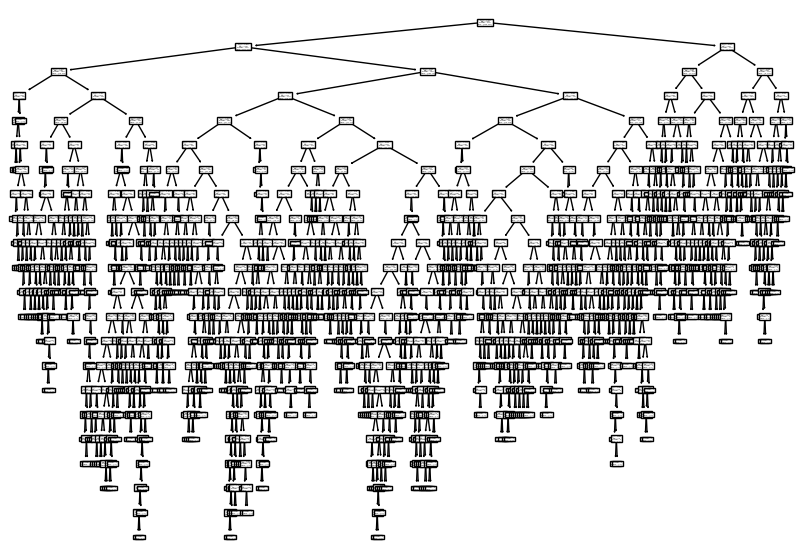

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
#maxfeatures, 사용할 특성의 개수를 지정할 수 있는데, 기본값이 None이다.
# 즉, None일 경우에는 모든 특성을 모두 사용하는데, 특성의 개수가 3보다 작을 때에는 일부 특성만을 이용한다.
# 만약 maxfeatures를 2로 지정했다면 2개만 선택 (랜덤하게)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
#0.99..

print(dt.score(test_scaled, test_target))
#0.859..

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#tree 모듈의 plot_tree를 임포트 하고,
#매개변수로 위에서 얻은 dt를 넘기면 아래처럼 트리를 그려준다.

plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

훈련 세트의 score가 99퍼센트 정도다.. 과대적합 되었음을 확인할 수 있다.

- 분류일 경우, 리프 노드의 샘플들 중, **다수의 클래스가 예측 클래스**로 되고,
- 회귀의 경우에는 리프 노드의 샘플들의 **타깃값의 평균이 예측값**이 된다.

그러나, 트리의 깊이를 제한하지 않으면, 위처럼 하염없이.. 분류를 한다.

이때 모든 리프노드(마지막노드)를 확인해보면, 하나의 클래스만이 있다. 즉, 불순도가 0이다.

### 6) 결정트리 분석

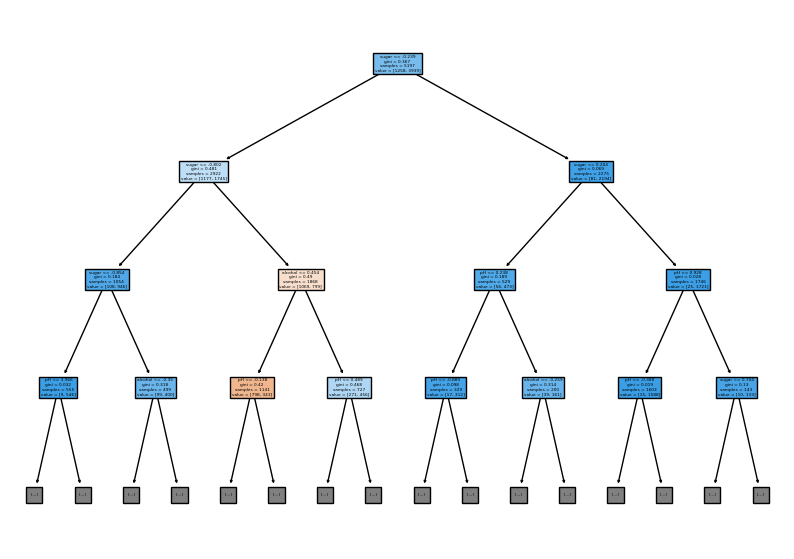

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


`max_depth`를 설정 가능하다.

`filled=True`를 해주면 **클래스마다 색을 부여하고, 노드 내에서 특정 클래스의 비율이 높아지면 색을 진하게 만든다.**

feature_names를 정해줌으로써 질문 기준을 확인 가능하다.

yes가 왼쪽, 오른쪽이 no이다.

`samples`를 통해 몇 개의 샘플이 이동했는지를 확인 가능하다.

`value`는 양성클래스와 음성 클래스의 개수이다. 그래서 두 개의 값을 더하면 samples와 같아진다.

여기서는 모두 당도로 나누었음을 확인 가능하다.

`gini`는 불순도 기준이다.

### 7) 지니 불순도

지니 불순도는 `DecisionTreeClassifier`의 `criterion` 매개변수와 관련이 있다.

왜냐하면, `critierion` 매개변수의 기본값이 `gini`이기 때문.


지니 불순도를 계산하는 방법은..

> **1 - ((음성클래스의 비율)^2 + (양성클래스의 비율)^2)**

부모의 지니불순도와 자식의 불순도를 뺐을 때, **차이가 가장 크게 나오는 방향으로 노드를 분할**한다. 이게 결정 트리의 방식이다.

- 만일 두 클래스가 정확히 나뉘어 졌다면, 지니 불순도는 0.5로 나온다 (가장 큰 값. 가장 불순한 상태)

- 만약 한 쪽 클래스로 샘플이 몰려가면 지니 불순도는 0으로 나온다. (가장 작은 값. 가장 순수한 상태) -> 순수 노드, 퓨어노드라고 부른다.

**즉, `gini` 값을 통해 노드의 불순도를 확인할 수 있다.**

보통 결정 트리는 맨 끝의 **리프노드가 순수노드가 될 때까지 분할을 진행**한다. 즉, 한 쪽 클래스만 속하도록 분할한다.

불순도 차이 계산 방법은...

> **부모의 불순도 - (왼쪽노드의 샘플 수/부모의 샘플수 x 왼쪽 노드의 불순도) - (오른쪽노드의 샘플 수/부모의 샘플수 x 오른쪽 노드의 불순도)**


사이킷런의 클래스가 이런식으로 계산을 한다는 것이지, 우리가 직접 계산을 할 필요는 없다.


### 8) 가지치기 (pruning)
위 트리를 보면.. 너무 복잡하다. 그래서 가지치기 과정이 필요하다.

0.8454877814123533
0.8415384615384616


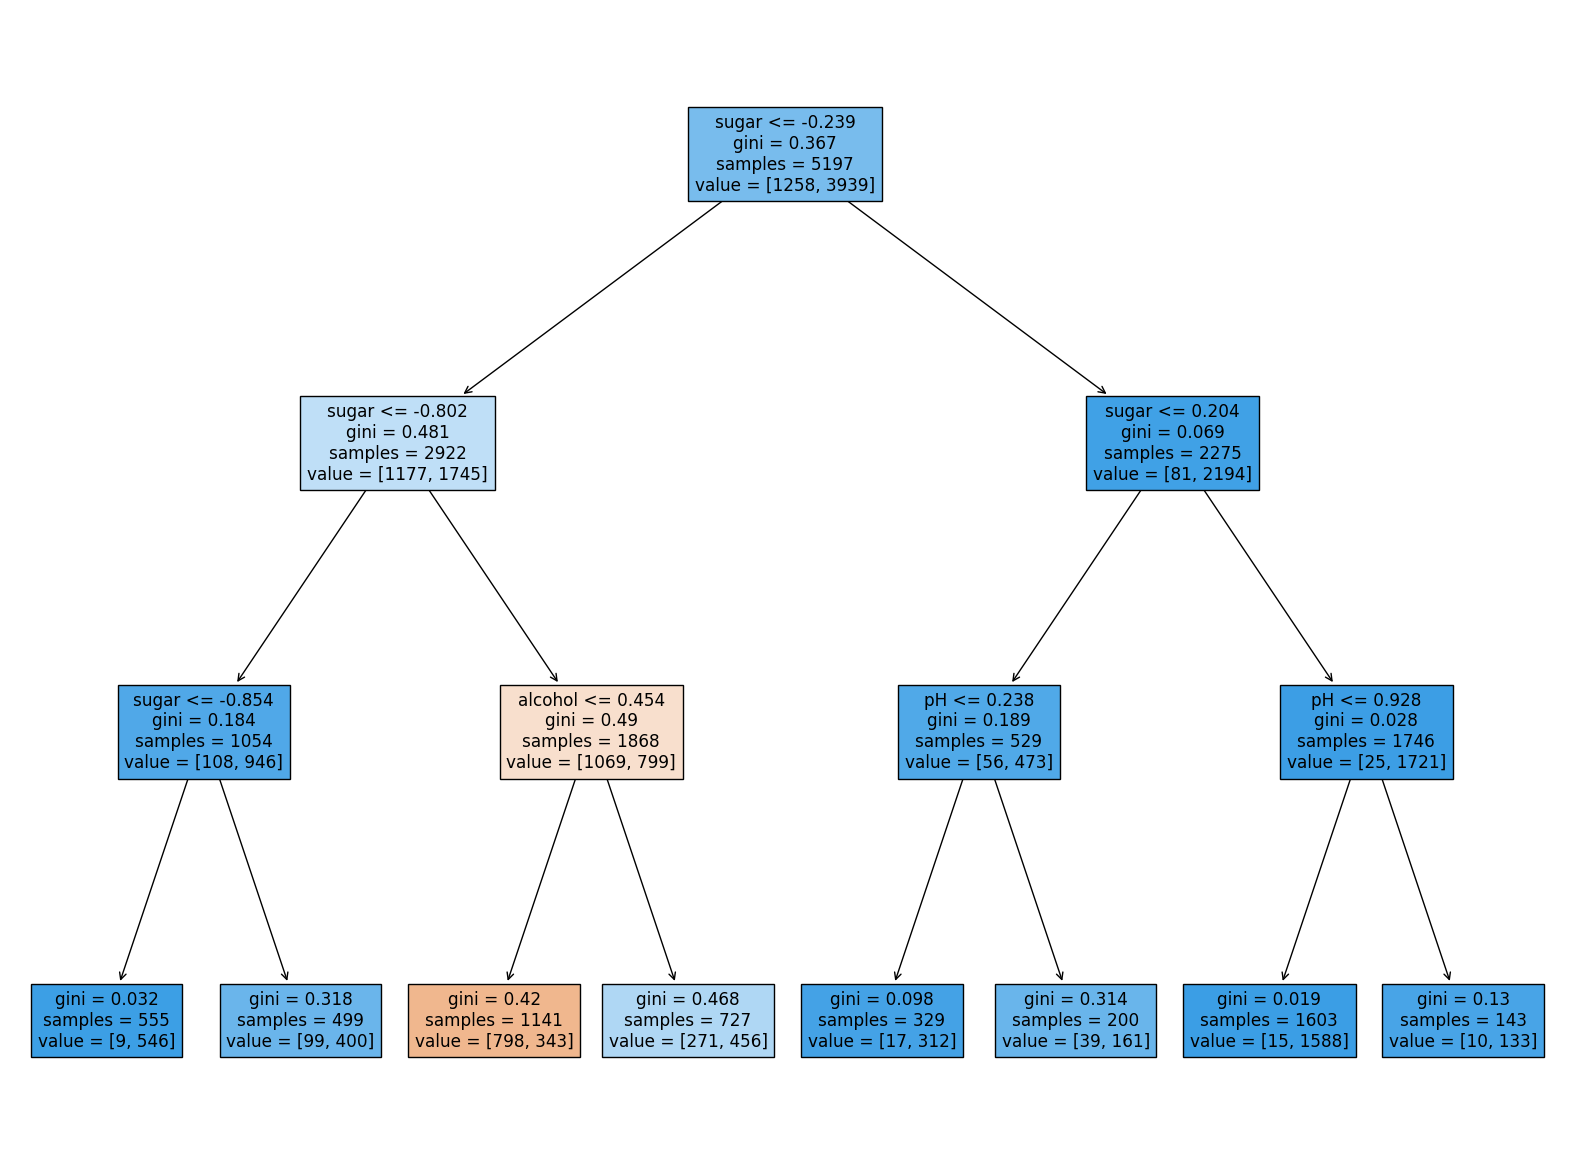

[0.12345626 0.86862934 0.0079144 ]


In [17]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
#max_depth를 정해 트리의 깊이를 제한한다.

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
#0.845...

print(dt.score(test_scaled, test_target))
#0.8415..

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

print(dt.feature_importances_)
#특성의 중요도 파악

위 예시예서는 트리의 깊이를 3까지, 즉 3개의 엣지까지 진행하도록 했다.

`dt.feature_importances_` 를 통해 특성 중요도 확인 가능한데, 훈련세트로부터 얻은 값이 기준이다.

여기서는 sugar가 가장 중요하게 사용되었음을 확인할 수 있다. (루트노드와 그 자식노드로도 슈가를 사용한 것부터 이를 확인할 수 있다.)

### 9) 결정트리의 특징

- 결정트리는 따로 **스케일을 맞출 필요가 없다.**
- 결정트리는 L1, L2 규제를 할 수 없다. 애초에 선형 함수를 만드는 게 아니기 때문이다. 애초에 가중치가 없으니 말이다.
- 여기서 학습하는 건** 분할을 하는 기준을 학습**하는 것이다.
- 결정트리를 깊이 만들면 너무 복잡해지고, 얕게 만들면 성능이 좀 안 좋다. 이를 **결정 트리의 딜레마**라고 한다.
- 그래서 여러 개의 결정 트리를 가지고 앙상블 모델을 만들 수가 있다.

## 4-2. 교차 검증과 그리드 서치

### 1) 검증세트
훈련 세트와 테스트 세트 말고도, 검증세트가 있다.

원래는 훈련세트, 테스트세트 말고도 검증세트까지 마련을 해야 가장 이상적이다.

**테스트 세트는 서비스의 성능을 예측하기 위해 사용한다.** (실전 투입전 정답을 모르니까, 특성만 가지고 예측을 하는 것.)

테스트 세트는 실전 투입 전 마지막 단계에 딱 한 번 쓰는 거고, 그 전엔 검증 세트를 이용함. (가끔 개발세트라고도 함)

**검증세트로 파라미터 매개변수를 튜닝**한다. (하이퍼 파라미터를)

이러한 검증세트는 train_test_split으로 2번 나누면 된다.

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state = 42)

sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

이렇게 해서 모델을 훈련하고 검증 세트로 파라미터를 맞춘 후,
**훈련세트와 검증세트를 더해서 최종적으로 모델에 돌려본다.**

왜냐면 모델훈련은.. 데이터가 많을 수록 좋기 때문이다.

다시 말해, 훈련 데이터를 train과 validation으로 나눴고, validation을 통해 최적의 파라미터를 찾았으면 train과 validation을 더해서 최종모델을 한 번 더 훈련한 뒤, 모델에 돌려본다.


**만약 테스트 세트로 최종적으로 돌렸는데 너무 점수가 낮으면.. 여러 번 다시 모델을 돌려보고 싶을 것이다. 그렇게해서 얻은 테스트 세트의 점수는 신뢰할 수 없다.**

그래서 이런 걸 충분히 유념에 두고 해야한다.


### 2) 교차 검증
여러 번의 검증을 진행해 평균낸다.

검증 세트를 떼어내서 매개변수 튜닝을 하는데, 만약 훈련세트가 크지 않다면, 20%나 덜어내는게 부담이 될 것이다.

그래서 검증세트를 3덩어리로, **3개의 폴드로 나누고** 처음에는 2개의 폴드로 훈련 후 1개로 평가, **이 과정을 3번 반복해서 (왜냐면 3개의 폴드니까) 얻은 모델 평가 점수 3개를 평균한다.**

그 검증 점수를 사용할 수 있음.

3번 돌리니까 검증세트가 작아도, 검증 점수를 평균했기 때문에 신뢰할 수 있음.

In [22]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

import numpy as np

print(np.mean(scores['test_score']))
#0.855...

{'fit_time': array([0.00786948, 0.0046308 , 0.00479007, 0.00482583, 0.00470877]), 'score_time': array([0.00147367, 0.00132918, 0.00340223, 0.00132275, 0.00125647]), 'test_score': array([0.84230769, 0.83365385, 0.84504331, 0.8373436 , 0.8479307 ])}
0.8412558303102096



for문으로 교차검증을 구현할 수 있지만 `cross_validate`라는 클래스를 이용한다.

보통은 5폴드를 사용한다. (train_input을 5분할 해서) 5개의 모델을 만들고, 5개의 모델 점수를 만든다.

평균내서 보면 85퍼센트 정도의 모델 정확도를 확인 가능하다.

### 3) 머신러닝과 딥러닝, 교차검증


검증세트, 훈련세트를 통해 교차검증을 했는데..

**DL쪽에서는 교차검증을 잘 안 쓴다.**

반대로, **ML쪽에서는 검증세트, 훈련세트를 교차검증을 하도록 권장**함.

DL은 이미 데이터가 많아서 굳이 교차검증을 할 필요가 없다. 즉, **훈련세트와 검증세트의 크기가 전체 데이터를 대표할만하게 크다.**

또 DL 자체가 자원을 많이 쓰는데 5번씩이나 쓰는 건.. 비효율적이다.

**ML은 대부분 교차검증과 그리드서치를 꼭 포함**시킴.

그래서 텐서플로, 케라스같은 딥러닝 라이브러리는 교차검증과 그리드서치 도구가 많지 않다. 대신 데이터를 읽어들이는 도구가 더 많다.

딥러닝에서는 그냥 검증세트를 나눈 것만으로도 충분하다.

### 4) 분할기(splitter)를 사용한 교차 검증
교차 검증은 `cross_validate` 클래스 말고도, splitter를 이용해서도 가능하다.

In [23]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
# 보통 5개의 폴드를 이용한다. 만약 10개의 폴드를 쓰고 싶으면 cv=10이라 적으면 됨.
# cv = 스플리트객체를 지정해서 나누는 걸 상세하게 제어할 수 있다.
# KFold()는 회귀 모델일 경우, 분류모델일 경우에는 StratifiedKFold()를 사용한다. (이전 train_test_split로 stratify와 같은 의미이다)
#매개변수로 회귀모델을 넣으면 KFold()로, 분류모델을 넣으면 StratifiedKFold()를 알아서 호출해주긴 한다.
print(np.mean(scores['test_score']))

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state = 42)
#10개의 폴드, 셔플해서 스플리트를 이용해보려한다.
scores = cross_validate(dt, train_input, train_target, cv = splitter)
#cv = splitter을 통해 교차검증을 시행할 수 있음.
print(np.mean(scores['test_score']))

0.8412558303102096
0.8335549132947977


### 5) 그리드 서치
교차검증을 여러 번 하기 위해 사용한다.

**그리드 서치**는 **어떤 매개변수에서 교차검증 점수가 가장 높게 나오는지**를 확인하기 위해 사용.

예를 들어, max_depth랑 min_impurity_decrease이 있다고 해보자.

max_depth의 최적값이 3임을 구했고, 그 다음으로 min_impurity_decrease를 구하는 방법으로.. 즉, 최적값을 매개변수 각각으로, 순차적으로 구할 수 없다.

각각의 매개변수가 상호간의 영향을 주기 때문에 순서대로 찾을 수 없다. **한 꺼번에 여러 개의 매개변수를 돌리고 찾아야한다.**

이럴 때 쓰는게 **그리드 서치**이다.

In [24]:
from sklearn.model_selection import GridSearchCV
# 사이킷런의 GridSearchCV 클래스는 하이퍼파라미터 탐색과 교차 검증을 한 번에 수행한다.

params = { 'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
# 파라미터 중, min_impurity_decrease를 하나 씩 정해본다.

gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs=-1)
#-1로 지정하면 모든 코어를 사용해서 돌리라는 뜻.
gs.fit(train_input, train_target)

dt = gs.best_estimator_
print(dt.score(train_input, train_target))
#0.96...

0.9615162593804117
{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


- `GridSearchCV`의 cv 매개변수 기본값은 5이다.
- 따라서, `min_impurity_decrease` 값마다 5-폴드 교차 검증을 수행한다.
- `n_jobs` 매개변수에서 병렬 실행에 사용할 CPU 코어 수를 지정할 수 있는데, 이 기본값은 1이다. 여기서는 -1로 지정해 시스템에 있는 모든 코어를 사용한다.
- `gs.best_estimator_`를 통해 검증 점수가 가장 높은 모델의 매개변수 ㅜ조합으로 전체 훈련세트에서 자동으로 다시 모델을 훈련하도록 한다.

In [26]:

print(gs.best_params_)

print(gs.cv_results_['mean_test_score'])

{'min_impurity_decrease': 0.0001}
[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


- `gs.best_params_`를 통해 가장 좋은 파라미터 값을 확인할 수 있다.
- 각 매개변수에서 실행한 교차 검증의 평균 점수는 `cv_results_` 속성의 `mean_test_score` 키에 저장되어 있다.

### 6) 랜덤 서치, 확률 분포 선택

- 매개 변수의 값이 수치일 때, **값의 범위나 간격을 미리 정하기 어려울 수** 있다.
- 또는, **매개 변수 조건이 너무 많아 그리드 서치 수행 시간이 오래걸릴** 수 있다.
이런 경우, **랜덤서치**를 사용하면 좋다.

랜덤서치는 **매개변수를 샘플링할 수 있는 확률 분포 객체를 전달**한다.

In [29]:
from scipy.stats import uniform, randint
#균등 분포 샘플링 클래스 uniform은 실수, randint는 정수
# 주어진 범위에서 고르게 값을 뽑는다. = 균등 분포에서 샘플링한다.

regen = randint(0,10)
regen.rvs(10)


array([2, 4, 1, 8, 2, 1, 1, 2, 5, 7])

`randint(0,10)`을 통해 0에서부터 10사이의 숫자, 즉 0~9의 숫자를 샘플링한 결과이다.

In [31]:
np.unique(regen.rvs(1000), return_counts = True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([107,  98,  99,  99, 102, 100,  89,  94, 111, 101]))

샘플링 수를 1000개로 늘리고(`regen.rvs(1000)`) 그 숫자를 세어보았다(`np.unique`)

결과를 통해, 고르게 샘플링 했음을 확인할 수 있다.

In [32]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.1232348 , 0.4371791 , 0.30731389, 0.51716198, 0.48438994,
       0.6656112 , 0.75370218, 0.70167425, 0.28389384, 0.92232395])

실수의 경우도 마찬가지이다.

### 7) 랜덤 서치

In [33]:
# 파라미터의 범위를 임의로 지정해준다.
params = { 'min_impurity_decrease' : uniform(0.0001, 0.001),
  'max_depth' : randint(20, 50),
  'min_samples_split' : randint(2,25),
  'min_samples_leaf' : randint(1,25) }

from sklearn.model_selection import RandomizedSearchCV
# 랜덤 서치 클래스를 임포트한다.

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(train_input, train_target)


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a6c695630>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f1a6c694130>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a6c694c10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1a6c695ea0>},
                   random_state=42)

In [35]:

print(gs.best_params_)

print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884
0.86


## 4-3 트리의 앙상블
여러 개의 트리를 한 꺼번에 사용한다.

### 1) 정형 데이터 vs 비정형 데이터

**정형데이터**는 DB, 엑셀, csv에 들어가는 데이터이다.

**비정형데이터**는 텍스트, 오디오, 이미지, 영상 같은.. 형식이 정해지지않은 데이터이다.

정형데이터는 특성공학이나 전처리를 통해 머신러닝 알고리즘에 적용할 수 있다.

반면 비정형데이터는 특성공학을 적용하기 어렵다. 그래서 특징을 찾아내야하는데, 이를 표현학습이라 한다. (그렇다고 딥러닝이 특성공학을 아예 사용하지 않는 것은 아니다.)

이런 **정형데이터를 사용한 머신러닝 알고리즘 중 가장 성능이 뛰어난 것이 트리의 앙상블**이다.

### 2) 랜덤 포레스트란?
랜덤 포레스트는.. 결정 트리를 랜덤하게 만들어서 숲을 만드는 알고리즘이다.

그냥 만드는게 아니라 **랜덤하게 만든다**는 점에 주목할 것.


랜덤 포레스트는 **부트스트랩 샘플**을 사용하는게 특징이다.

원래 훈련세트에 각각다른 5개의 샘플이 있다고 해보자.

원래 훈련 세트와 **샘플의 개수가 같게 샘플을 뽑는다**. 이때 **중복이 허용**된다. 이런걸 중복을 허용한 샘플링이라고 한다.

당연히 중복된 샘플을 쓰니까 성능은 그리 좋다고는 할 수 없다.

이렇게 얻은 부트스트랩 샘플로, 모델을 훈련하고 그 성능을 측정한다.



> 분류일 경우의 예측

- 결정 트리에서 나오는 확률을 모두 더한다. 그 후 트리 개수로 나눈다.
- sum(확률)/트리개수
- 거기서 가장 큰 값을 고른다.

> 회귀일 경우의 예측

- 결정트리에서 나오는 예측 값을 평균하면 된다.
- sum(예측값)/트리개수

이렇게 만들면, 원본 샘플을 훈련했을 때 만큼 성능이 나오지 않는다.

여기까지는 샘플링을 조작해 모델의 성능을 낮춰보았다.


이번엔 트리의 노드가 분할 될 때를 살펴보려 한다.

트리의 노드를 분할 할 때 노드의 불순도 차이가 최대가 되도록 노드를 분류한다고 했는데, 이 과정에 훼방을 놓아야 한다.

각 노드를 분할 할 때, **전체 특성 중에서 일부 특성을 무작위로 고른 뒤, 이 중 최선의 분할을 찾는다.**

- 분류의 경우 : **전체 특성 개수의 제곱근**만큼
- 회귀의 경우 : **전체 특성**

즉, 최적의 분할을 하지 못 하도록 훼방을 둔다.

---

최종적으로 정리해보자면, 훈련세트를 랜덤하게 선택하고(부트스트링 샘플), 노드를 분할할 후보를 랜덤하게 함으로써 트리가 과대적합 되는 것을 막을 수 있다.

이렇게 하면 당연히 트리의 성능은 떨어진다.

참고로, 기본적으로 **랜덤포레스트는 100개의 트리를 만든다**.

### 3) 랜덤 포레스트 훈련
랜덤 포레스트를 이용한 코드를 작성해보려 한다.

In [39]:
from sklearn.model_selection import cross_validate
# 랜덤 포레스트 객체를 교차 검증해서 성능을 확인해 볼 것이다.
from sklearn.ensemble import RandomForestClassifier
# ensemble 모듈 밑에 RandomForestClassifier있음

rf = RandomForestClassifier(n_jobs=-1, random_state = 42)
#n_jobs=-1을 통해 여러 개의 모든 코어를 사용.
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# 훈련 특성, 타깃값을 각각 넣어주고, 훈련 스코어도 뽑도록 할 거임. return_train_score=True를 통해 train_score를 뽑을 수 있음.

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 이름만 테스트 스코어지 사실 검증세트이다.
#0.9973... 0.8905..

0.9973541965122431 0.8905151032797809


In [40]:
#이제 fit을 하면 더이상 파라미터 튜닝이 필요 없음을 가정.

rf.fit(train_input, train_target)
print(rf.feature_importances_)
#[0.23...]
# 특성을 랜덤하게 선택하다보니, 다른 특성도 테스트를 해볼수 밖에 없는, 특성을 강제적으로 사용할 수 밖에 없게 만듦.
# 그래서 확률이 어느 한 쪽에 과하게 쏠리지 않음을 확인할 수 있다.

[0.23167441 0.50039841 0.26792718]


In [41]:
# 트리를 훈련하면서 쓰이지 않은 샘플이 있을 수 있다.
#이를 oob이라고 하는데, 뽑히지 않은, 남는 샘플이 있을 것이다.

# 디폴트로는 oob 세트를 가지고 성능을 평가하지 않는다.
# True로 지정해두면, oob 를 사용할 수 있다.

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)
#0.893...

0.8934000384837406


### 4) 엑스트라 트리


랜덤 포레스트랑 전반적으로 비슷하다.
주의할 건, ExtraTree's'라는 거.

- 똑같이 100개의 트리를 만들고,
- 분류는 특성개수의 제곱근,
- 회귀는 특성개수를 사용한다.

단, **엑스트라트리는 부트스트랩 샘플을 사용하지 않는다.**

**엑스트라트리는 전체 샘플을 사용**하되, 다른 식으로 무작위성을 주입한다.

**노드 분할 시, 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할**한다.

랜덤 포레스트와 비교했을 때..
- 속도가 빠르고
- 랜덤 포레스트보다는 트리의 개수를 늘려야 더 좋은 성능을 낼 수 있다.

### 5) 엑스트라 트리 훈련


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

et.fit(train_input, train_target)
print(et.feature_importances_)


0.9974503966084433 0.8887848893166506
[0.20183568 0.52242907 0.27573525]


### 6) 그레이디언트 부스팅
앙상블 모듈 중 이 그레이디언트 부스팅 클래스가 가장.. 소위 '급이 높다'고 할 수 있다.

그레이디언트 부스팅은 결정 트리를 계속 추가하면서 **가장 낮은 곳을 찾아 이동**한다.

이런 점에서, 이전에 배웠던 경사하강법과 비슷하다고 볼 수 있다.

경사하강법을 배울 때, 손실함수의 낮은 곳으로 이동할 때 '조금씩' 움직여야한다고 했었다. 그레이디언트 부스팅도 마찬가지로, 같은 이유로 **깊이가 얕은 트리**를 추가한다.

또한, 그레이디언트 부스팅은 학습률 매개변수(`learning_rate`) 를 통해 속도를 조절할 수 있다.

- 랜덤포레스트, 엑스트라트리에 비해 속도가 느림.
- (앞에 알고리즘은 병렬적으로 훈련이 가능하나, 그레이디언트 부스팅은 직렬적으로 훈련해야한다.)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
#ensemble 모듈 안에 있음.

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.8881086892152563 0.8720430147331015


과대 적합이 거의 되지 않았음을 확인 할 수 있다.

그레이디언트 부스팅은 **결정 트리의 개수를 늘려도 과대적합에 강하다.**


In [53]:
#n_estimators를 늘려서, learning_rate도 0.1에서 0.2로
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#훈련 세트의 값은 높고, 검증 세트의 값은 변화가 별로 없다.


0.9464595437171814 0.8780082549788999


In [54]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


이 그레이디언트 부스팅의 단점이 느린 속도라고 했었다.

이를 개선한 것이 **히스토그램 기반 그레이디언트 부스팅**이다.


### 7) 히스토그램 기반 그레이디언트 부스팅
정형 데이터를 다루는 머신러닝 알고리즘 중 가장 인기가 높다.

- 입력 특성을 256개의 구간으로 나누기 때문에, 노드 분할 시 최적의 분할을 매우 빠르게 찾을 수 있다.

- 단, 히스토그램 기반 그레이디언트 부스팅은 256개의 구간 중 하나를 떼어서 누락된 값을 위해 사용한다. 그래서 누락값에 대한 전처리 과정이 필요없다.



In [55]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


0.9321723946453317 0.8801241948619236


### 8) Permutation Importance : 치환 중요도


첫 번째 특성을 섞는다. (위치를 바꿔)

그럼 당연히 성능이 떨어질 것이다.

이런 말도안되는 작업을 여러 번 반복해서 성능을 측정한다.

그 다음으로는 첫 번째를 그 대로 두고, 2번째 특성을 섞는다.

- 이렇게 다음 특성, 특성...을 섞고 성능을 구한다.

- 계산이 모두 끝났다면, 원래의 데이터 성능을 계산한뒤, 차이를 비교해본다.

ex) 원래는 90%, 첫번째를 섞었을 때 성능은 80%, 두 번째를 섞었을 때 70%... 그럼 두 번째 특성이 더 중요하다고 볼 수 있다. (섞었을때 성능이 떨어졌으니까)

In [59]:

from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state = 42, n_jobs=-1)
# 특성마다 10번 섞어서 값을 낸다 (기본값은 5)

print(result.importances_mean)
# 합이 1이 안 됨. 그냥 정확도의 차이..

result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs=-1)

print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]
[0.05969231 0.20238462 0.049     ]


- `Permutation_importance()` 함수가 반환하는 객체는 반복해서 얻은 특성 중요도(`importances`), 평균(`importances_mean`), 표준편차(`importances_std`)를 담고 있다.

In [60]:

hgb.score(test_input, test_target)
#permutation Importance는 테스트 세트도 돌릴 수 있다. (실전에 넣었을 때 어떤 특성에 더 민감한지를 찾을 수 있음.)

0.8723076923076923

### 9) XGBoost vs LightGBM (그래디언트 부스팅 전용 라이브러리)

사이킷런 말고도, 히스토그램 기반 그레이디언트 부스팅 알고리즘을 구현한 라이브러리가 여럿 있다.

**XGBoost**
: 코랩 뿐만 아니라 사이킷런의 cross_validate와도 함께 사용 가능하다.

`tree_method`를 `hist`로 지정하면, 히스토그램 기반 그레이디언트 부스팅을 사용할 수 있다.

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score = True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))



0.9558403027491312 0.8782000074035686


**LIghtGBM**
: XGBoost와 같이 코랩 뿐만 아니라 사이킷런의 cross_validate와도 함께 사용 가능하다.

In [62]:

from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
